# Employee Attrition Data Analysis

In this Jupyter notebook, I will be analysing data I found on Kaggle regarding employee attrition in a fictious company.

In [15]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy

In [16]:
data = pd.read_csv("Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# What Percentage Of Employees In The Dataset Have Left The Company?

Fortunately, every employee has a value in the attrition column - of yes or no, making this question easily answerable.

In [17]:
df1 = data.groupby('Attrition').Attrition.count()
print(df1)

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


About 19% of the employees in the dataset or no longer in the company. Let us plot this in a pie chart.

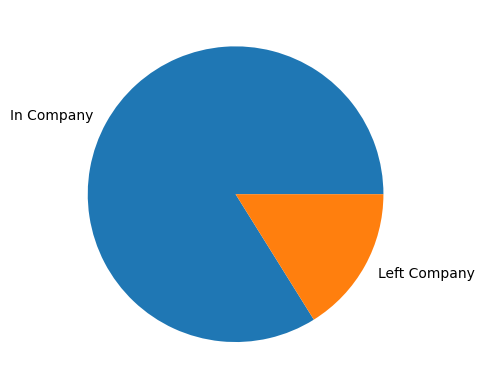

In [44]:
y = numpy.array([1233, 237])
mylabels = ["In Company", "Left Company"]

plt.pie(y, labels = mylabels)
plt.show() 

# Is There A Correlation Between Hourly Rates And Attrition Rates?

The first question I'm interested in answering is whether there is a correlation between the hourly rates and attrition rates. It should be noted that attrition rates have not been explicitly defined in the given data. Therefore, for my purposes, I will define it as the number of employees who have left the company / total number of employees.

Let us first find the list of possible hourly rates

In [18]:
#Function to get all possible Hourly Rates

hourlyRates = list(set(data['HourlyRate'].tolist()))
print(hourlyRates)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


Let us then find the list of possible attrition rates, listed so that each attrition rate has the same index in the final list as the corresponding hourly rate.

In [19]:
attritionRateList = []
for x in hourlyRates:
    numerator = data.loc[(data.HourlyRate == x) & (data.Attrition == 'Yes')].count()['Attrition']
    denominator = data.loc[(data.HourlyRate == x)].count()['Attrition']
    attritionRateList.append(numerator/denominator)

print(attritionRateList)

[0.0, 0.13333333333333333, 0.16666666666666666, 0.15789473684210525, 0.4166666666666667, 0.05555555555555555, 0.2777777777777778, 0.16666666666666666, 0.3076923076923077, 0.23529411764705882, 0.1111111111111111, 0.09523809523809523, 0.0, 0.16666666666666666, 0.05555555555555555, 0.20833333333333334, 0.2, 0.125, 0.17857142857142858, 0.1111111111111111, 0.375, 0.22727272727272727, 0.19230769230769232, 0.14285714285714285, 0.19230769230769232, 0.1875, 0.15384615384615385, 0.2222222222222222, 0.29411764705882354, 0.047619047619047616, 0.08695652173913043, 0.15, 0.08695652173913043, 0.25, 0.21052631578947367, 0.10526315789473684, 0.2413793103448276, 0.15789473684210525, 0.14285714285714285, 0.26666666666666666, 0.375, 0.16666666666666666, 0.2, 0.20833333333333334, 0.1, 0.05, 0.05263157894736842, 0.14285714285714285, 0.08695652173913043, 0.2222222222222222, 0.047619047619047616, 0.13636363636363635, 0.13043478260869565, 0.045454545454545456, 0.21428571428571427, 0.3333333333333333, 0.1818181

Plotting this data into a scatterplot, we can see that there is a weak negative correlation between hourly rates and attrition rates.

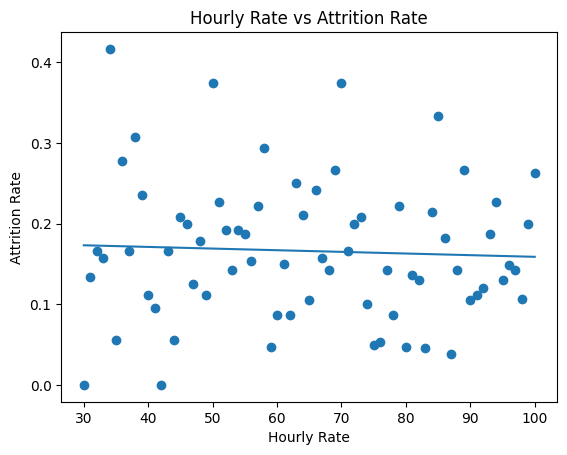

The trendline has an equation of: 
-0.0002044 x + 0.1793


In [23]:
plt.scatter(hourlyRates, attritionRateList)

plt.title("Hourly Rate vs Attrition Rate")
plt.xlabel("Hourly Rate")
plt.ylabel("Attrition Rate")

z = numpy.polyfit(hourlyRates, attritionRateList, 1)
p = numpy.poly1d(z)

plt.plot(hourlyRates, p(hourlyRates))

plt.show()
print("The trendline has an equation of:" + str(p))

# Is There A Correlation Between The Number Of Previous Employers And Attrition Rate?

Let us start by listing out all the possible values of the former.

In [26]:
numCompanies = list(set(data['NumCompaniesWorked'].tolist()))
print(numCompanies)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Using a method similar to the above:

In [72]:
attritionRateList = []
for x in numCompanies:
    numerator = data.loc[(data.NumCompaniesWorked == x) & (data.Attrition == 'Yes')].count()['Attrition']
    denominator = data.loc[(data.NumCompaniesWorked == x)].count()['Attrition']
    attritionRateList.append(numerator/denominator)

print(attritionRateList)

[0.116751269035533, 0.18809980806142035, 0.1095890410958904, 0.10062893081761007, 0.1223021582733813, 0.25396825396825395, 0.22857142857142856, 0.22972972972972974, 0.12244897959183673, 0.23076923076923078]


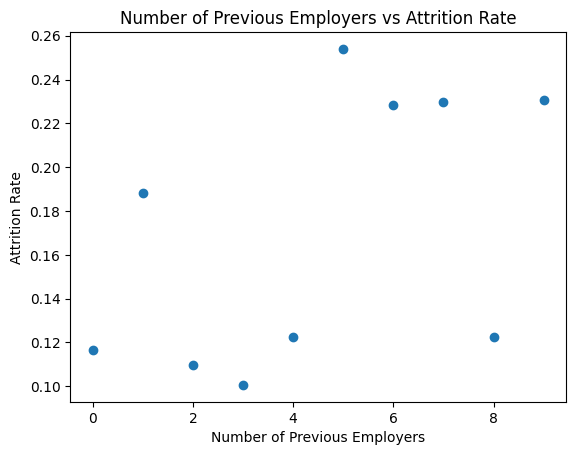

In [73]:
plt.scatter(numCompanies, attritionRateList)

plt.title("Number of Previous Employers vs Attrition Rate")
plt.xlabel("Number of Previous Employers")
plt.ylabel("Attrition Rate")

plt.show()

Considering how scattered the data is, perhaps including a trendline wouldn't be the best choice. The positions of the data on the scatter plot also suggests that theres isn't a strong correlation between these 2 sets of data

# Which Jobs In The Company Have The Highest Attrition Rate?

In [36]:
jobRoles = list(set(data['JobRole'].tolist()))
print(jobRoles)

['Research Scientist', 'Research Director', 'Sales Executive', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Manufacturing Director', 'Human Resources', 'Laboratory Technician']


In [38]:
attritionRateList = []
for x in jobRoles:
    numerator = data.loc[(data.JobRole == x) & (data.Attrition == 'Yes')].count()['Attrition']
    denominator = data.loc[(data.JobRole == x)].count()['Attrition']
    attritionRateList.append(numerator/denominator)

print(attritionRateList)

[0.16095890410958905, 0.025, 0.17484662576687116, 0.06870229007633588, 0.049019607843137254, 0.39759036144578314, 0.06896551724137931, 0.23076923076923078, 0.23938223938223938]


Let us sort this list in increasing order, and make the corresponding changes in order to jobRoles, so that the indexes of both lists match up still.

In [69]:
attritionRateListSorted = numpy.array(attritionRateList)
jobRolesSorted = numpy.array(jobRoles)
idx   = numpy.argsort(attritionRateListSorted)

attritionRateListSorted = numpy.array(attritionRateListSorted)[idx]
jobRolesSorted = numpy.array(jobRolesSorted)[idx]

print(attritionRateListSorted)
print(jobRolesSorted)

[0.025      0.04901961 0.06870229 0.06896552 0.1609589  0.17484663
 0.23076923 0.23938224 0.39759036]
['Research Director' 'Manager' 'Healthcare Representative'
 'Manufacturing Director' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Laboratory Technician' 'Sales Representative']


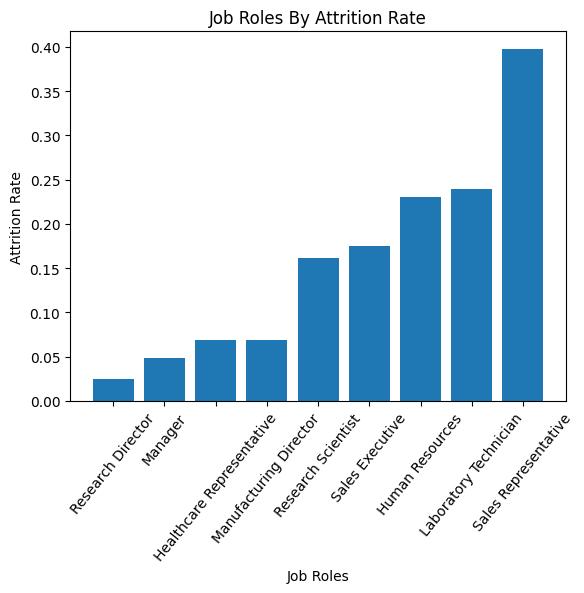

In [70]:
plt.bar(jobRolesSorted, attritionRateListSorted)

plt.title("Job Roles By Attrition Rate")
plt.xlabel("Job Roles")
plt.ylabel("Attrition Rate")
plt.xticks(rotation = 51)
plt.show()

Research directors have the lowest attrition rate at 2.5%, while sales representatives have the highest attrition rate at around 40%.

# What Are Employees Most Dissatisfied With?

The employees in the dataset rated their satisfaction with their experience at the company based on 4 metrics - satisfaction with the relationships they have with their coworkers, environment satisfaction, job satisfaction, and work life balance. This was rated on a scale of 1 to 4, with 4 being the highest. If a rating of 1 to 2 is taken to mean that an employee is dissatisfied with the a criteria, let us determine what employees are most dissatisfied with: 

Let us calculate the percentae of employees disatisfied with each of the four metrics as follows

In [84]:
numEmployees = len(data.index) 

Relationship = data.loc[(data.RelationshipSatisfaction <= 2)].count()['Attrition']
ratioRelationship = Relationship / numEmployees
print("Dissatisfied with relationships: " + str(ratioRelationship))

Environment = data.loc[(data.EnvironmentSatisfaction <= 2)].count()['Attrition']
ratioEnvironment = Environment / numEmployees
print("Dissatisfied with environment: " + str(ratioEnvironment))

Job = data.loc[(data.JobSatisfaction <= 2)].count()['Attrition']
ratioJob = Job / numEmployees
print("Dissatisfied with job: " + str(ratioJob))


WLB = data.loc[(data.WorkLifeBalance <= 2)].count()['Attrition']
ratioWLB = WLB / numEmployees
print("Dissatisfied with work life balance: " + str(ratioWLB))

Dissatisfied with relationships: 0.39387755102040817
Dissatisfied with environment: 0.38843537414965984
Dissatisfied with job: 0.3870748299319728
Dissatisfied with work life balance: 0.28843537414965986


Let us visualize this data with a bar chart

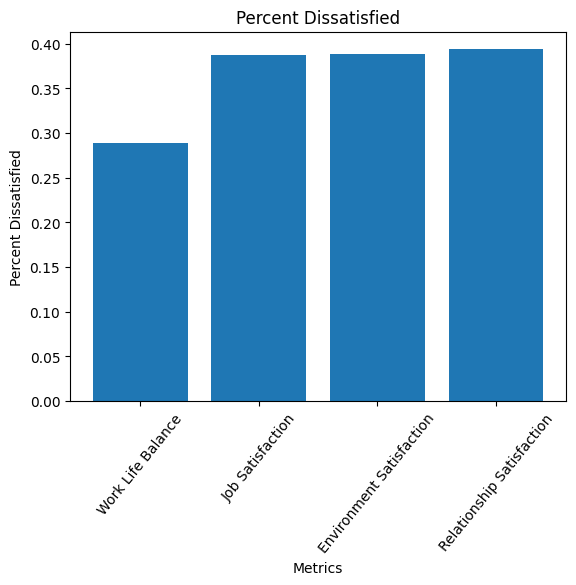

In [87]:
metrics = ['Work Life Balance', 'Job Satisfaction', 'Environment Satisfaction', 'Relationship Satisfaction']
values = [0.28843537414965986, 0.3870748299319728, 0.38843537414965984, 0.39387755102040817]


plt.bar(metrics, values)

plt.title("Percent Dissatisfied")
plt.xlabel("Metrics")
plt.ylabel("Percent Dissatisfied")
plt.xticks(rotation = 51)
plt.show()

Work life balance appears to be a strong point for this company - it is the metric employees are least dissatisfied with. Approximately 29% of employees are dissatisfied with their work life balance.

Relationship satisfaction is the category with the highest percentage of disatisfied employees, at around 40%. It should be noted, however, that the percentage of employees with low job satisfaction, environment satisfaction, and relationship satisfaction are all similar, with the former two around 39%.